# **Project Description**
## **Email Spam Detection**
Dataset link: https://www.kaggle.com/datasets/subhajournal/phishingemails


# ***1.Download the dataset***

In [ ]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d subhajournal/phishingemails

 55% 10.0M/18.0M [00:00<00:00, 38.7MB/s]
100% 18.0M/18.0M [00:00<00:00, 59.0MB/s]


In [ ]:
!unzip /content/phishingemails.zip

Archive:  /content/phishingemails.zip
  inflating: Phishing_Email.csv      


#**2. Import necessary Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding,GRU,LSTM,Bidirectional,SimpleRNN
from tensorflow.keras.utils import pad_sequences
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense,Dropout
import tensorflow as tf
import warnings

warnings.filterwarnings('ignore')

# **3. Load the dataset**

In [ ]:
df = pd.read_csv(r'/content/Phishing_Email.csv')
df.head() #view fast five rows only

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


# **4. Text Preprocessing**

In [ ]:
#checking null values
df.isna().sum()

Unnamed: 0     0
Email Text    16
Email Type     0
dtype: int64

**There are 16 rows available that have null values .Let's remove these rows**

## **4.1 Drop duplicate and null values**

In [ ]:
#drop the duplicate and null values

df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.dropna(inplace=True,axis=0)
df.drop_duplicates(inplace=True)

In [ ]:
print("Dimension of the row data:",df.shape)

Dimension of the row data: (17538, 2)


In [ ]:
df.head()

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


## **4.2 checking the balance of the dataset**

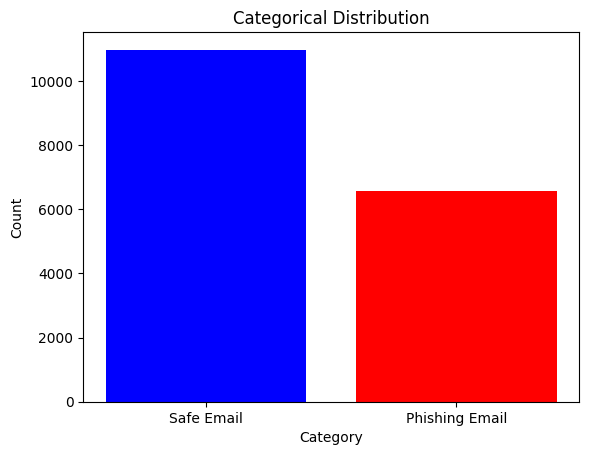

In [ ]:
#checking the balance of the dataset

index = df['Email Type'].value_counts().index
values = df['Email Type'].value_counts().values
plt.bar(index,values,color=['blue','red'])
plt.title("Categorical Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

## **4.3 Integer Encoding**

In [ ]:
#convert the categorical label into numerical
lbl = LabelEncoder()
df['Email Type'] = lbl.fit_transform(df['Email Type']) ### 0 denotes pishing and 1 denotes safe

## **4.4 Remove hyperlinks, punctuations, extra space**

In [ ]:
import re

def preprocess_text(text):
    # Remove hyperlinks
    text = re.sub(r'http\S+', '', text)

    # Remove punctuations
    text = re.sub(r'[^\w\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text


# Apply the preprocess_text function to the specified column in the DataFrame
df["Email Text"] =df["Email Text"].apply(preprocess_text)


In [ ]:
#final overview

df.head()

,Email Text,Email Type
0,re 6 1100 disc uniformitarianism re 1086 sex l...,1
1,the other side of galicismos galicismo is a sp...,1
2,re equistar deal tickets are you still availab...,1
3,hello i am your hot lil horny toy i am the one...,0
4,software at incredibly low prices 86 lower dra...,0


# **Wordcloud**
## **wordcloud of available stopwords**

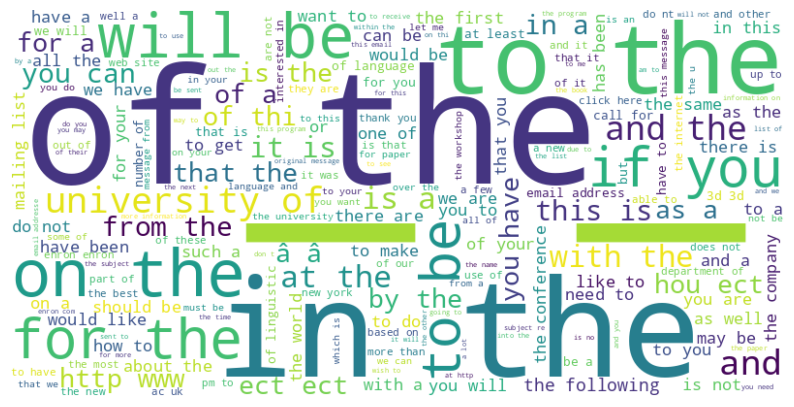

In [ ]:
from wordcloud import WordCloud

#combine all rows into a single string
all_mails = " ".join(df['Email Text'])

#create a wordcloud object
word_cloud = WordCloud(stopwords="english",width=800,height=400,background_color='white').generate(all_mails)

plt.figure(figsize=(10,6))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.show()

## **wordcloude of unique words**

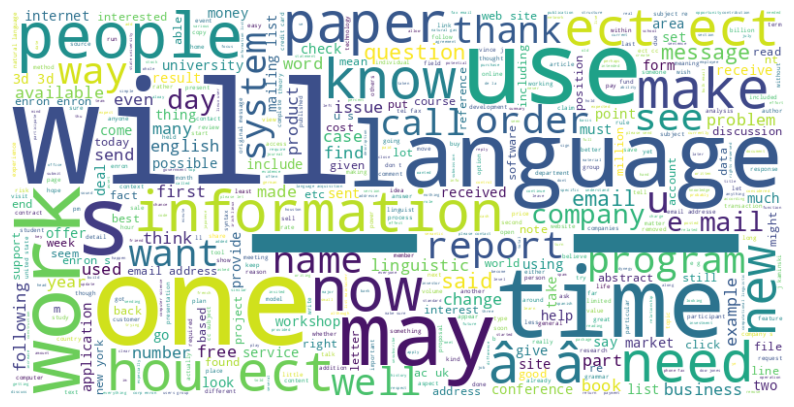

In [ ]:

#combine all rows into a single string
all_mails = " ".join(df['Email Text'])

#create a wordcloud object
word_cloud = WordCloud(width=800,height=400,background_color='white',max_words=10000).generate(all_mails)
plt.figure(figsize=(10,6))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.show()

# **4.5 converting text into vector**
## **4.5.1 Tfidf Vectorizer**

In [ ]:
# passing object
tf = TfidfVectorizer(stop_words='english',max_features=10000) #dimension reduction
feature_x = tf.fit_transform(df['Email Text']).toarray()

In [ ]:
y_tf = np.array(df['Email Type']) # convert the label into numpy array

## **4.5.2 Split into train and test set**

In [ ]:
X_tr,X_tst,y_tr,y_tst = train_test_split(feature_x,y_tf,test_size=0.2,random_state=0)

# **5 Applying different algorithm**
## **5.1 Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_tr,y_tr)

MultinomialNB()

accuracy from native bayes: 97.52 %
f1 score from naive bayes: 97.99 %
classification report :

               precision    recall  f1-score   support

           0       0.97      0.96      0.97      1351
           1       0.98      0.98      0.98      2157

    accuracy                           0.98      3508
   macro avg       0.97      0.97      0.97      3508
weighted avg       0.98      0.98      0.98      3508



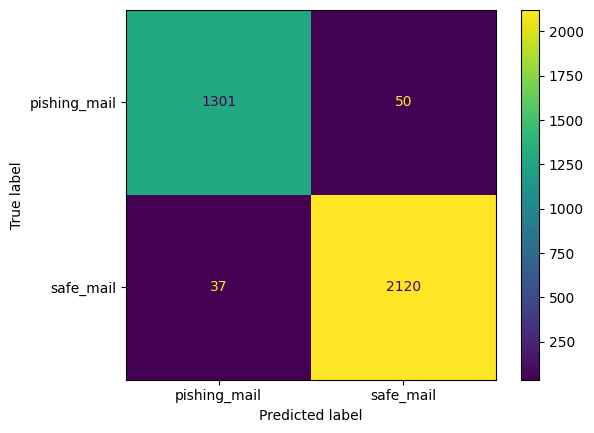

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
pred_nav = nb.predict(X_tst)

# Checking the performance

print(f"accuracy from native bayes: {accuracy_score(y_tst,pred_nav)*100:.2f} %")
print(f"f1 score from naive bayes: {f1_score(y_tst,pred_nav)*100:.2f} %")
print("classification report :\n\n",classification_report(y_tst,pred_nav))

#confusion matrix
clf_nav = confusion_matrix(y_tst,pred_nav)
cx_ = ConfusionMatrixDisplay(clf_nav,display_labels=['pishing_mail','safe_mail']).plot()
plt.show()

## **5.2 Logistic Regression**


accuracy from logistic regression:97.95 %
f1 score from logistic regression: 98.34 %
classification report : 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      1351
           1       0.98      0.99      0.98      2157

    accuracy                           0.98      3508
   macro avg       0.98      0.98      0.98      3508
weighted avg       0.98      0.98      0.98      3508



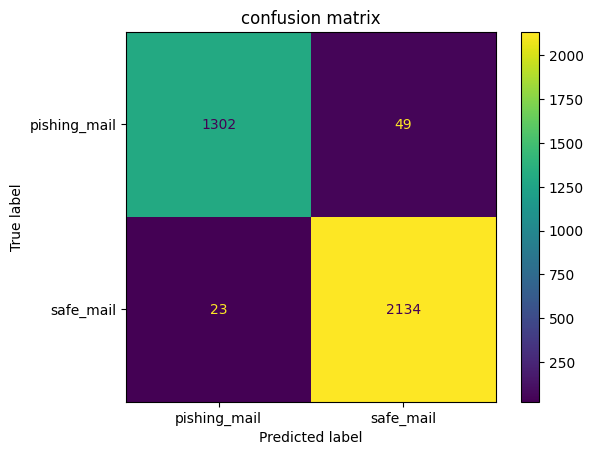

In [ ]:
# passing object
lg = LogisticRegression()
lg.fit(X_tr,y_tr)

# prediction
pred_lg = lg.predict(X_tst)
# performance
print("")
print(f"accuracy from logistic regression:{accuracy_score(y_tst,pred_lg)*100:.2f} %")
print(f"f1 score from logistic regression: {f1_score(y_tst,pred_lg)*100:.2f} %")
print("classification report : \n",classification_report(y_tst,pred_lg))

clf_lg = confusion_matrix(y_tst,pred_lg)
cx_ = ConfusionMatrixDisplay(clf_lg,display_labels=['pishing_mail','safe_mail']).plot()
plt.title("confusion matrix")
plt.show()

In [ ]:
# save the model for future use

import joblib

# Save the trained model to a file
joblib.dump(nb, 'email_spam_nb.pkl')


['email_spam_nb.pkl']

# **SGDClassifier**

accuracy from logistic regression:98.57 %
f1 score from logistic regression: 98.84 %
classification report : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1351
           1       0.99      0.99      0.99      2157

    accuracy                           0.99      3508
   macro avg       0.98      0.99      0.98      3508
weighted avg       0.99      0.99      0.99      3508



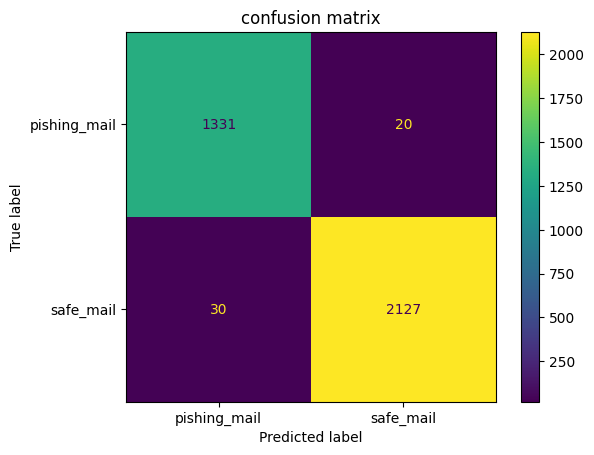

In [ ]:
from sklearn.linear_model import SGDClassifier

# passing object
sgd = SGDClassifier()
sgd.fit(X_tr,y_tr)

# prediction
pred_sgd = sgd.predict(X_tst)
# performance
print(f"accuracy from logistic regression:{accuracy_score(y_tst,pred_sgd)*100:.2f} %")
print(f"f1 score from logistic regression: {f1_score(y_tst,pred_sgd)*100:.2f} %")
print("classification report : \n",classification_report(y_tst,pred_sgd))

clf_sgd = confusion_matrix(y_tst,pred_sgd)
cx_ = ConfusionMatrixDisplay(clf_sgd,display_labels=['pishing_mail','safe_mail']).plot()
plt.title("confusion matrix")
plt.show()

## **5.3 XGBoost**

accuracy from XGB:97.21 %
f1 score from XGB: 97.72 %
classification report : 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      1351
           1       0.98      0.98      0.98      2157

    accuracy                           0.97      3508
   macro avg       0.97      0.97      0.97      3508
weighted avg       0.97      0.97      0.97      3508



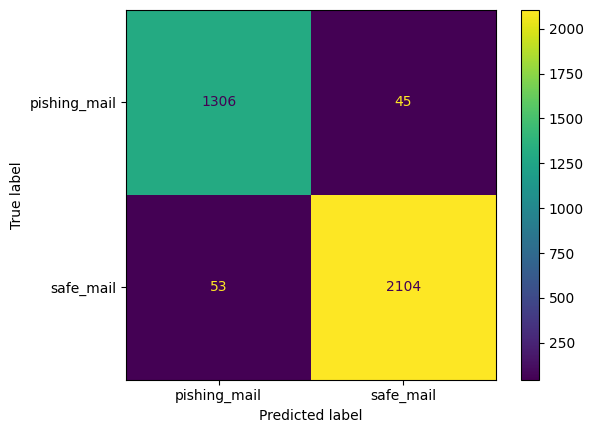

In [ ]:
# applying boosting algorithm
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_tr,y_tr)

#prediction
pred_xgb = xgb.predict(X_tst)

#performance
print(f"accuracy from XGB:{accuracy_score(y_tst,pred_xgb)*100:.2f} %")
print(f"f1 score from XGB: {f1_score(y_tst,pred_xgb)*100:.2f} %")
print("classification report : \n",classification_report(y_tst,pred_xgb))

#confusion matrix
clf_xgb = confusion_matrix(y_tst,pred_xgb)
cx_ = ConfusionMatrixDisplay(clf_xgb,display_labels=['pishing_mail','safe_mail']).plot()
plt.show()

## **5.4 Decision Tree**

accuracy from Decision Tree:93.67 %
f1 score from Decision Tree: 94.81 %
classification report : 
               precision    recall  f1-score   support

           0       0.91      0.93      0.92      1351
           1       0.96      0.94      0.95      2157

    accuracy                           0.94      3508
   macro avg       0.93      0.94      0.93      3508
weighted avg       0.94      0.94      0.94      3508



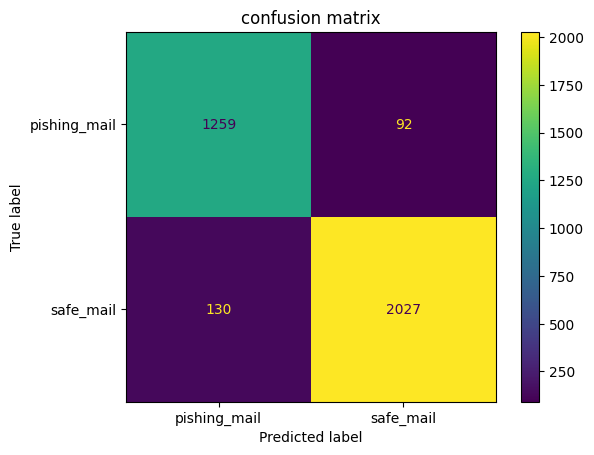

In [ ]:
dtr = DecisionTreeClassifier() #passing object
dtr.fit(X_tr,y_tr)

#prediction
pred_dtr = dtr.predict(X_tst)

#performance
print(f"accuracy from Decision Tree:{accuracy_score(y_tst,pred_dtr)*100:.2f} %")
print(f"f1 score from Decision Tree: {f1_score(y_tst,pred_dtr)*100:.2f} %")
print("classification report : \n",classification_report(y_tst,pred_dtr))

#confusion matrix
clf_dtr = confusion_matrix(y_tst,pred_dtr)
cx_ = ConfusionMatrixDisplay(clf_dtr,display_labels=['pishing_mail','safe_mail']).plot()
plt.title("confusion matrix")
plt.show()

## **5.5 Random Forest**

accuracy from rnadom forest:97.72 %
f1 score from random forest: 98.13 %
classification report : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1351
           1       0.99      0.98      0.98      2157

    accuracy                           0.98      3508
   macro avg       0.97      0.98      0.98      3508
weighted avg       0.98      0.98      0.98      3508



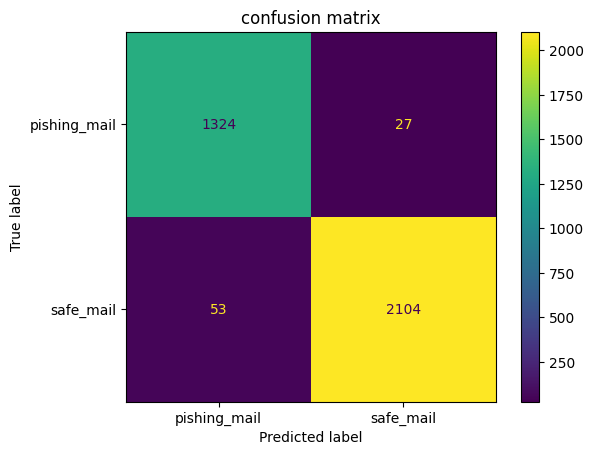

In [ ]:
rnf = RandomForestClassifier() #passing object
rnf.fit(X_tr,y_tr)

#prediction
pred_rnf = rnf.predict(X_tst)

#performance
print(f"accuracy from rnadom forest:{accuracy_score(y_tst,pred_rnf)*100:.2f} %")
print(f"f1 score from random forest: {f1_score(y_tst,pred_rnf)*100:.2f} %")
print("classification report : \n",classification_report(y_tst,pred_rnf))

#confusion matrix
clf_rnf = confusion_matrix(y_tst,pred_rnf)
cx_ = ConfusionMatrixDisplay(clf_rnf,display_labels=['pishing_mail','safe_mail']).plot()
plt.title("confusion matrix")
plt.show()

## **5.6 MLP Classifier**

accuracy from MLP:98.46 %
f1 score from MLP: 98.75 %
classification report : 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1351
           1       0.99      0.99      0.99      2157

    accuracy                           0.98      3508
   macro avg       0.98      0.98      0.98      3508
weighted avg       0.98      0.98      0.98      3508



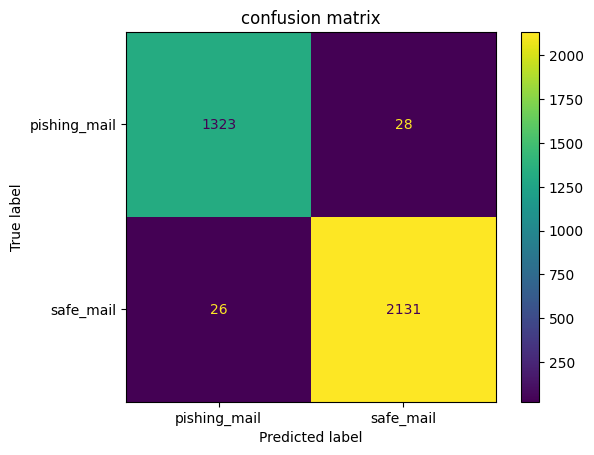

In [ ]:
mlp = MLPClassifier()  # passing object
mlp.fit(X_tr,y_tr)

#prediction
pred_mlp = mlp.predict(X_tst)

#performance
print(f"accuracy from MLP:{accuracy_score(y_tst,pred_mlp)*100:.2f} %")
print(f"f1 score from MLP: {f1_score(y_tst,pred_mlp)*100:.2f} %")
print("classification report : \n",classification_report(y_tst,pred_mlp))

#confusion matrix
clf_mlp = confusion_matrix(y_tst,pred_mlp)
cx_ = ConfusionMatrixDisplay(clf_mlp,display_labels=['pishing_mail','safe_mail']).plot()
plt.title("confusion matrix")
plt.show()

## **5.7 EDA comparison of the models performances**

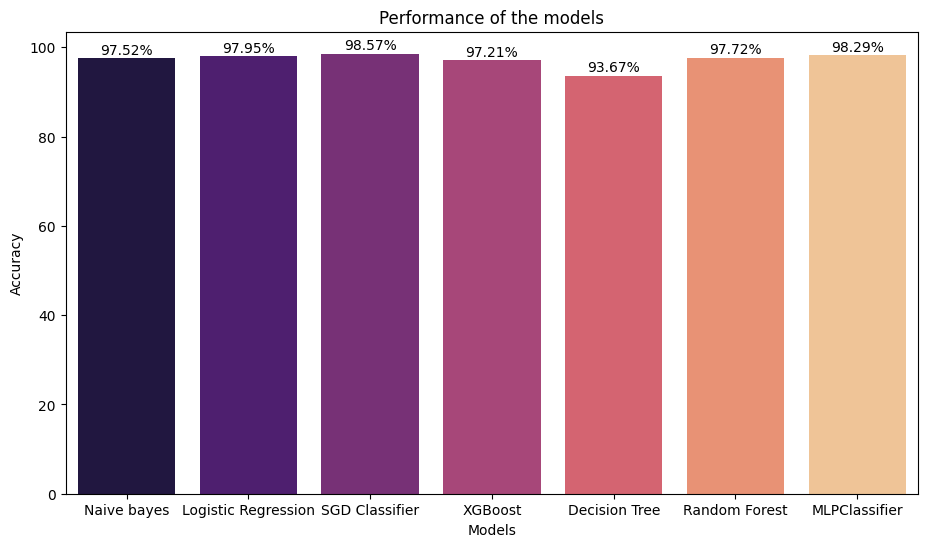

In [ ]:
import plotly.express as px
models = ['Naive bayes','Logistic Regression','SGD Classifier','XGBoost','Decision Tree','Random Forest','MLPClassifier']
accuracies = [97.52,97.95,98.57,97.21,93.67,97.72,98.29]
plt.figure(figsize=(11,6))

#create bar plot
ax = sns.barplot(x=models,y=accuracies,palette='magma')

#add annotation above each bar
for i, accuracy in enumerate(accuracies):
    ax.text(i, accuracy + 0.2, f'{accuracy:.2f}%', ha='center', va='bottom', fontsize=10, color='black')

plt.title("Performance of the models")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()

# **6 Neural Network**

In [ ]:
max_len = 150 #Fixed the length of each vector

tk = Tokenizer()

# Process the text

tk.fit_on_texts(df['Email Text'])
sequences = tk.texts_to_sequences(df['Email Text'])
vector = pad_sequences(sequences,padding='post', maxlen=max_len)

In [ ]:
len(vector)

17538

In [ ]:
#convert feature vector and label into array
X = np.array(vector)
y = np.array(df['Email Type'])

In [ ]:
#Split the dataset into train and test set

x_train, x_test, y_train, y_test = train_test_split(vector,df['Email Type'], test_size=0.2, random_state =0)

# **SimpleRNN**

In [ ]:
model_smp = Sequential() # Sequential() API
model_smp.add(Embedding(input_dim=len(tk.word_index)+1,output_dim=50,input_length=150))
model_smp.add(SimpleRNN(units=100))
model_smp.add(Dropout(0.5))
model_smp .add(Dense(1, activation='sigmoid'))

In [ ]:
model_smp.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['accuracy'])

In [ ]:
model_smp.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 150, 50)           9115850   
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 100)               15100     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 9131051 (34.83 MB)
Trainable params: 9131051 (34.83 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
historical_smp  = model_smp.fit(x_train,y_train, epochs=7, batch_size=16, validation_data=(x_test,y_test))

Epoch 1/7
877/877 [==============================] - 240s 272ms/step - loss: 0.7017 - accuracy: 0.5718 - val_loss: 0.6365 - val_accuracy: 0.6365
Epoch 2/7
877/877 [==============================] - 237s 270ms/step - loss: 0.6000 - accuracy: 0.6523 - val_loss: 0.5637 - val_accuracy: 0.6844
Epoch 3/7
877/877 [==============================] - 233s 266ms/step - loss: 0.4858 - accuracy: 0.7297 - val_loss: 0.5107 - val_accuracy: 0.6499
Epoch 4/7
877/877 [==============================] - 236s 269ms/step - loss: 0.4679 - accuracy: 0.7419 - val_loss: 0.5895 - val_accuracy: 0.6941
Epoch 5/7
877/877 [==============================] - 233s 266ms/step - loss: 0.4397 - accuracy: 0.8091 - val_loss: 0.3079 - val_accuracy: 0.9005
Epoch 6/7
877/877 [==============================] - 236s 268ms/step - loss: 0.2595 - accuracy: 0.9202 - val_loss: 0.3069 - val_accuracy: 0.8977
Epoch 7/7
877/877 [==============================] - 245s 280ms/step - loss: 0.2206 - accuracy: 0.9393 - val_loss: 0.2974 - val_ac

Text(0, 0.5, 'Loss')

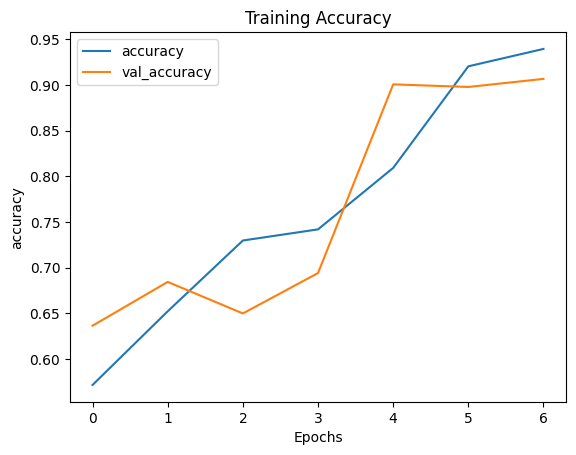

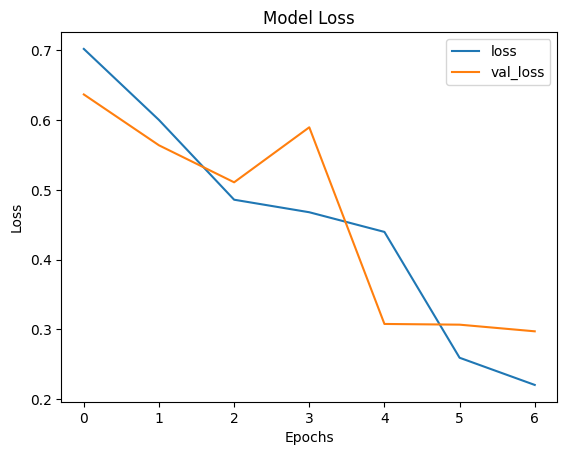

In [ ]:
import matplotlib.pyplot as plt
pd.DataFrame(historical_smp.history)

pd.DataFrame(historical_smp.history)[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')

pd.DataFrame(historical_smp.history)[['loss', 'val_loss']].plot()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

110/110 [==============================] - 2s 19ms/step


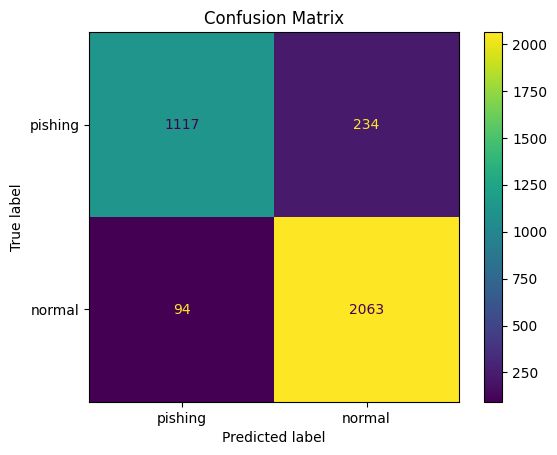

In [ ]:
y_pred_prob_smp = model_smp.predict(x_test)
y_pred_smp = (y_pred_prob_smp > 0.5).astype(int)

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cnf_smp = confusion_matrix(y_test,y_pred_smp)
ax_smp = ConfusionMatrixDisplay(confusion_matrix=cnf_smp,display_labels=['pishing','normal']).plot()
plt.title("Confusion Matrix")
plt.show()


# **6.1 LSTM Architecture**

In [ ]:
model = Sequential() # Sequential() API
model.add(Embedding(input_dim=len(tk.word_index)+1,output_dim=50,input_length=150))
model.add(LSTM(units=100))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 150, 50)           9115850   
                                                                 
 lstm_1 (LSTM)               (None, 100)               60400     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 9176351 (35.01 MB)
Trainable params: 9176351 (35.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
historical  = model.fit(x_train,y_train, epochs=5, batch_size=16, validation_data=(x_test,y_test))

Epoch 1/5
877/877 [==============================] - 278s 314ms/step - loss: 0.4086 - accuracy: 0.8198 - val_loss: 0.2423 - val_accuracy: 0.9179
Epoch 2/5
877/877 [==============================] - 271s 309ms/step - loss: 0.1949 - accuracy: 0.9436 - val_loss: 0.1541 - val_accuracy: 0.9561
Epoch 3/5
877/877 [==============================] - 271s 309ms/step - loss: 0.1293 - accuracy: 0.9681 - val_loss: 0.1650 - val_accuracy: 0.9538
Epoch 4/5
877/877 [==============================] - 272s 310ms/step - loss: 0.1477 - accuracy: 0.9545 - val_loss: 0.1527 - val_accuracy: 0.9595
Epoch 5/5
877/877 [==============================] - 270s 308ms/step - loss: 0.1042 - accuracy: 0.9751 - val_loss: 0.1616 - val_accuracy: 0.9550


# **Performance**

In [ ]:
results = model.evaluate(x_test, y_test)
loss = results[0]  # Extract the loss from the results
accuracy = results[1]  # Extract the accuracy from the results

print(f"Model Loss: {loss}")
print(f"Model Accuracy: {accuracy*100}")

110/110 [==============================] - 4s 39ms/step - loss: 0.1616 - accuracy: 0.9550
Model Loss: 0.16161981225013733
Model Accuracy: 95.49601078033447


In [ ]:
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

110/110 [==============================] - 4s 32ms/step


Text(0, 0.5, 'Loss')

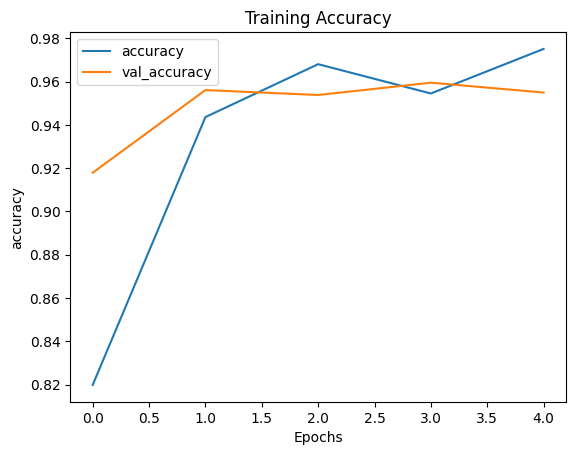

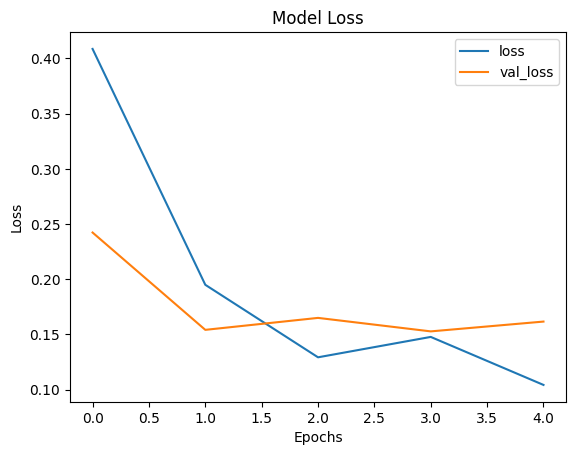

In [ ]:
import matplotlib.pyplot as plt
pd.DataFrame(historical.history)

pd.DataFrame(historical.history)[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')

pd.DataFrame(historical.history)[['loss', 'val_loss']].plot()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

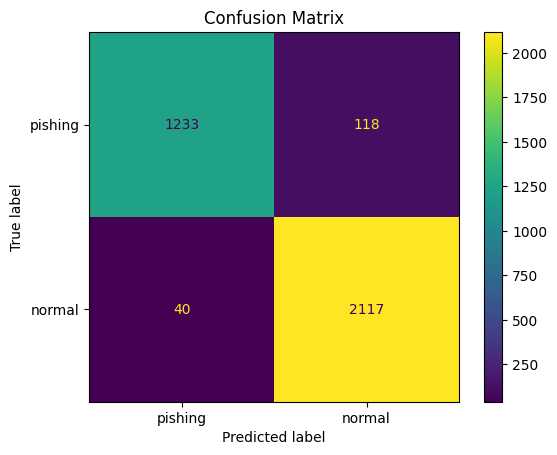

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cnf = confusion_matrix(y_test,y_pred)
ax = ConfusionMatrixDisplay(confusion_matrix=cnf,display_labels=['pishing','normal'])
ax.plot()
plt.title("Confusion Matrix")
plt.show()

# **Bidirectional**

In [ ]:
model_bi = Sequential() # Sequential() API
model_bi.add(Embedding(input_dim=len(tk.word_index)+1,output_dim=50,input_length=150))
model_bi.add(Bidirectional(LSTM(units=100)))
model_bi.add(Dropout(0.5))
model_bi.add(Dense(1, activation='sigmoid'))

In [ ]:
model_bi.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['accuracy'])

In [ ]:
model_bi.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 150, 50)           9115850   
                                                                 
 bidirectional (Bidirection  (None, 200)               120800    
 al)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 200)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 201       
                                                                 
Total params: 9236851 (35.24 MB)
Trainable params: 9236851 (35.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
historical  = model_bi.fit(x_train,y_train, epochs=2, batch_size=16, validation_data=(x_test,y_test))

Epoch 1/2
877/877 [==============================] - 341s 382ms/step - loss: 0.2059 - accuracy: 0.9199 - val_loss: 0.0897 - val_accuracy: 0.9669
Epoch 2/2
877/877 [==============================] - 335s 382ms/step - loss: 0.0423 - accuracy: 0.9878 - val_loss: 0.0776 - val_accuracy: 0.9738


In [ ]:
model_bi.evaluate(x_test,y_test)

110/110 [==============================] - 5s 48ms/step - loss: 0.0776 - accuracy: 0.9738


[0.07755590230226517, 0.973774254322052]

In [ ]:
y_pred_prob_bi = model_bi.predict(x_test)
y_pred_bi = (y_pred_prob_bi > 0.5).astype(int)

110/110 [==============================] - 6s 48ms/step


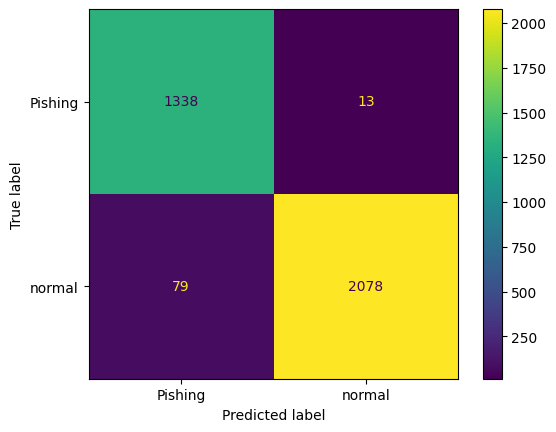

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cnf_bi = confusion_matrix(y_test,y_pred_bi)
ax_bi = ConfusionMatrixDisplay(confusion_matrix=cnf_bi,display_labels=['Pishing','normal'])
ax_bi.plot()
plt.show()

# **Gated Recurrent Unit**

In [ ]:
model_gru = Sequential() # Sequential() API
model_gru.add(Embedding(input_dim=len(tk.word_index)+1,output_dim=50,input_length=150))
model_gru.add(GRU(units=100))
model_gru.add(Dropout(0.5))
model_gru.add(Dense(1, activation='sigmoid'))

In [ ]:
model_gru.compile(loss='binary_crossentropy' , optimizer='adam', metrics=['accuracy'])

In [ ]:
model_gru.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 150, 50)           9115850   
                                                                 
 gru (GRU)                   (None, 100)               45600     
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 9161551 (34.95 MB)
Trainable params: 9161551 (34.95 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_gru.fit(x_train,y_train, epochs=3, batch_size=16, validation_data=(x_test,y_test))

Epoch 1/3
877/877 [==============================] - 272s 307ms/step - loss: 0.4846 - accuracy: 0.7663 - val_loss: 0.3044 - val_accuracy: 0.8940
Epoch 2/3
877/877 [==============================] - 268s 306ms/step - loss: 0.3252 - accuracy: 0.8599 - val_loss: 0.1868 - val_accuracy: 0.9464
Epoch 3/3
877/877 [==============================] - 270s 308ms/step - loss: 0.3346 - accuracy: 0.8578 - val_loss: 0.1228 - val_accuracy: 0.9587


In [ ]:
y_pred_prob_gru = model_gru.predict(x_test)
y_pred_gru = (y_pred_prob_gru > 0.5).astype(int)

110/110 [==============================] - 3s 26ms/step


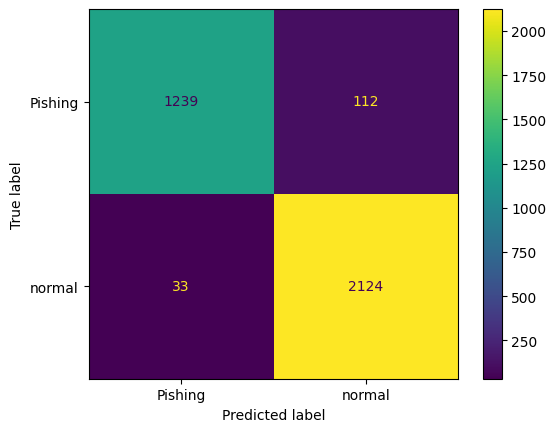

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cnf_gru = confusion_matrix(y_test,y_pred_gru)
ax_gru = ConfusionMatrixDisplay(confusion_matrix=cnf_gru,display_labels=['Pishing','normal'])
ax_gru.plot()
plt.show()